In [3]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [4]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# The number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

# Number of words to consider as features
maximum_features = 10000
# After this amount of words, cut the texts
#(among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maximum_features)

x_train = x_train[:100]
y_train = y_train[:100]

# This turns our lists of integers into a 2D integer tensor of shape
#`(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model = Sequential()

# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs

model.add(Embedding(10000, 8, input_length=max_len))

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))

#compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - acc: 0.4953 - loss: 0.6936 - val_acc: 0.5000 - val_loss: 0.6948
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9086 - loss: 0.6655 - val_acc: 0.5500 - val_loss: 0.6942
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 0.9516 - loss: 0.6467 - val_acc: 0.4500 - val_loss: 0.6946
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9758 - loss: 0.6309 - val_acc: 0.4000 - val_loss: 0.6941
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - acc: 0.9898 - loss: 0.6140 - val_acc: 0.4500 - val_loss: 0.6941
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 0.9898 - loss: 0.5952 - val_acc: 0.4500 - val_loss: 0.6948
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 0.9898 - loss: 0.5805 - val_acc: 0.4500 - val_loss: 0.6945
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 0.9820 - loss: 0.5619 - val_acc: 0.5000 - val_loss: 0.6927
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 1.0000 - loss: 0.5448 -

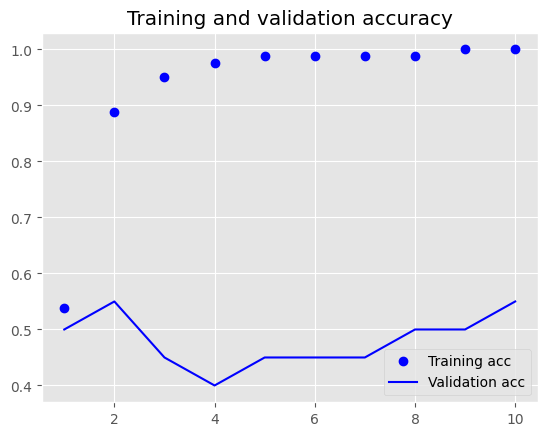

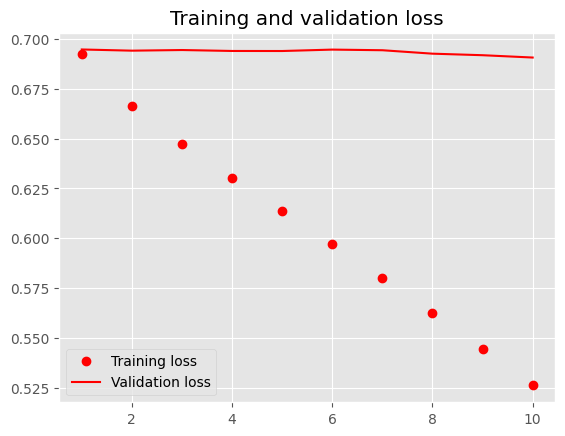

In [6]:
import matplotlib.pyplot as plt

# Training accuracy
acc = history.history["acc"]
# Validation accuracy
valid_accuracy = history.history["val_acc"]
# Training loss
loss = history.history["loss"]
# Validation loss
valid_loss = history.history["val_loss"]

#plots every epoch, here 10
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, valid_accuracy, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [7]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4956 - loss: 0.6947
Test loss: 0.6949981451034546
Test accuracy: 0.4942399859428406


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.5150 - loss: 0.6933 - val_acc: 0.5500 - val_loss: 0.6916
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.7699 - loss: 0.6732 - val_acc: 0.5800 - val_loss: 0.6909
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9294 - loss: 0.6561 - val_acc: 0.5600 - val_loss: 0.6905
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9221 - loss: 0.6423 - val_acc: 0.5700 - val_loss: 0.6899
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9567 - loss: 0.6214 - val_acc: 0.5700 - val_loss: 0.6894
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9737 - loss: 0.5946 - val_acc: 0.5500 - val_loss: 0.6888
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9706 - loss: 0.5649 - val_acc: 0.5500 - val_loss: 0.6884
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9743 - loss: 0.5386 - val_acc: 0.5500 - val_loss: 0.6884
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9803 - lo

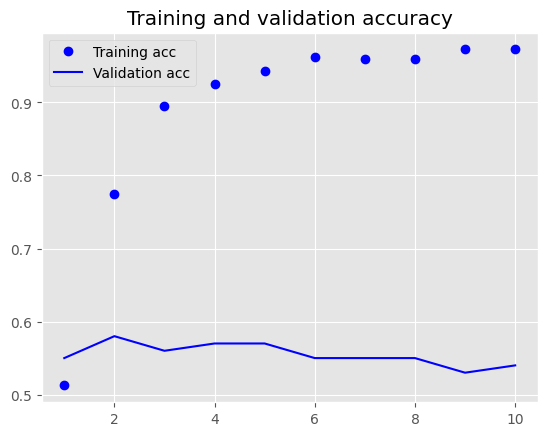

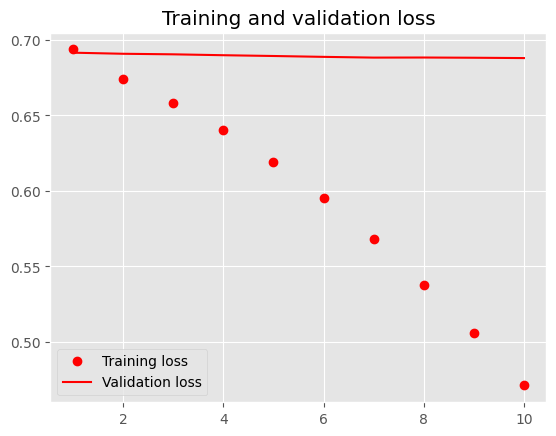

In [8]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
maximum_features = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maximum_features)

x_train = x_train[:500]
y_train = y_train[:500]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=max_len))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.
# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
valid_accuracy = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
valid_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, valid_accuracy, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [9]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.5508 - loss: 0.6871
Test loss: 0.6871663331985474
Test accuracy: 0.5493599772453308


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.4491 - loss: 0.6945 - val_acc: 0.5400 - val_loss: 0.6914
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7496 - loss: 0.6775 - val_acc: 0.5550 - val_loss: 0.6903
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8740 - loss: 0.6630 - val_acc: 0.5550 - val_loss: 0.6886
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9257 - loss: 0.6397 - val_acc: 0.5500 - val_loss: 0.6864
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9613 - loss: 0.6141 - val_acc: 0.5800 - val_loss: 0.6835
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9578 - loss: 0.5841 - val_acc: 0.6100 - val_loss: 0.6797
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9700 - loss: 0.5454 - val_acc: 0.6150 - val_loss: 0.6749
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9637 - loss: 0.5031 - val_acc: 0.6250 - val_loss: 0.6697
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9726 - loss:

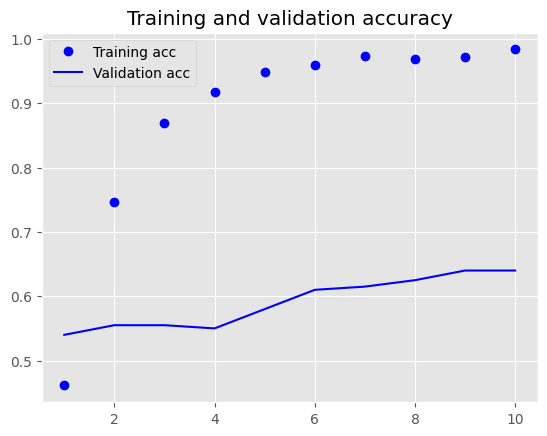

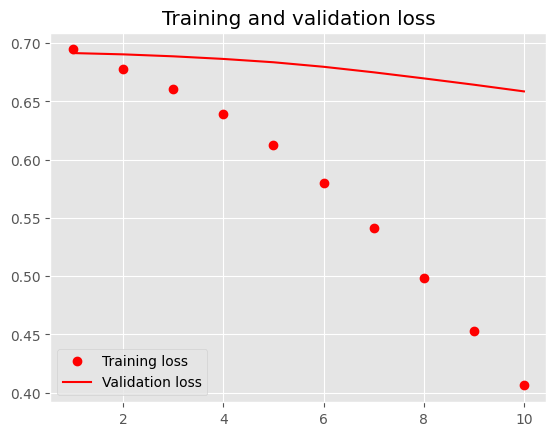

In [10]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
maximum_features = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maximum_features)

x_train = x_train[:1000]
y_train = y_train[:1000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=max_len))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
valid_accuracy = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
valid_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, valid_accuracy, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [11]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.6002 - loss: 0.6679
Test loss: 0.668613612651825
Test accuracy: 0.5982800126075745


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.5514 - loss: 0.6890 - val_acc: 0.6975 - val_loss: 0.6463
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7759 - loss: 0.5830 - val_acc: 0.8165 - val_loss: 0.4643
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.8559 - loss: 0.3985 - val_acc: 0.8495 - val_loss: 0.3661
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8923 - loss: 0.3045 - val_acc: 0.8545 - val_loss: 0.3372
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9153 - loss: 0.2431 - val_acc: 0.8565 - val_loss: 0.3227
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9286 - loss: 0.2047 - val_acc: 0.8650 - val_loss: 0.3167
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9437 - loss: 0.1714 - val_acc: 0.8630 - val_loss: 0.3201
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9573 - loss: 0.1455 - val_acc: 0.8605 - val_loss: 0.3249
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

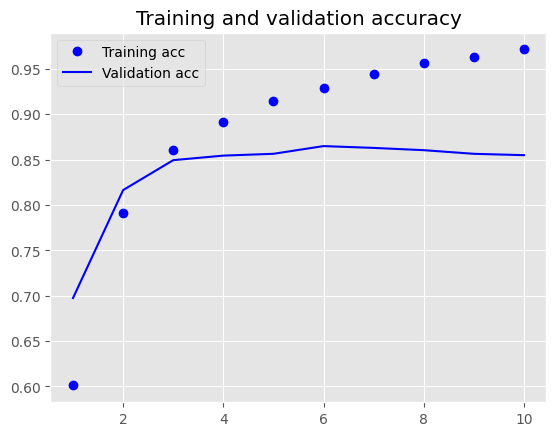

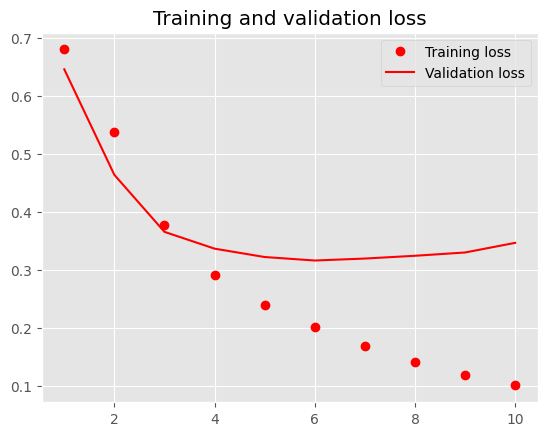

In [12]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
maximum_features = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maximum_features)

x_train = x_train[:10000]
y_train = y_train[:10000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=max_len))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
valid_accuracy = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
valid_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, valid_accuracy, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [13]:
test_loss, T_accuracy_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8527 - loss: 0.3502
Test loss: 0.3483450710773468
Test accuracy: 0.5982800126075745


In [14]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  4810k      0  0:00:17  0:00:17 --:--:-- 3601k


In [15]:
import os
import shutil

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


If your dataset is too small to train word embeddings effectively, you can instead utilize pretrained embeddings.
The training data consists of a list of review labels (positive or negative) and a corresponding list of review texts, where each element in the list represents an individual review as a string.

**Data tokenization**

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

maxlen = 150 # cuts off review after 150 words
training_samples = 100 # Trains on 100 samples
validation_samples = 10000 # Validates 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index    # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


**Downloading and preparing the word embedding for Glove**

In [17]:
import numpy as np
import requests
from io import BytesIO
import zipfile  # importing zipfile module

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


An embedding layer requires an embedding matrix to be added, with dimensions defined by (maximum vocabulary size, embedding dimension) — in this case, 10,000 × 100. By comparison, GloVe embeddings are organized with dimensions of 100 × 400,000.

Configuring the word embedding matrix using GloVe.

In [18]:
embedding_dimension = 100

embedding_matrix = np.zeros((max_words, embedding_dimension))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dimension, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Add the Embedding layer with initial weights and set trainable to False
model.add(Embedding(max_words, embedding_dimension, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

In [21]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

When using pretrained word embeddings in the Embedding layer, the trainable parameter can be set to False to keep the layer fixed during training. If it is set to True, the optimization process will adjust the embedding weights. To retain the valuable information captured by pretrained embeddings, it’s best to prevent them from being updated until the training phase has concluded.

In [22]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5')

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - acc: 0.5252 - loss: 2.0597 - val_acc: 0.5138 - val_loss: 0.7086
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 891ms/step - acc: 0.7509 - loss: 0.4558 - val_acc: 0.4897 - val_loss: 0.8927
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 372ms/step - acc: 0.6085 - loss: 0.9355 - val_acc: 0.4914 - val_loss: 0.8265
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - acc: 0.9785 - loss: 0.1785 - val_acc: 0.4892 - val_loss: 1.0598
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - acc: 0.9691 - loss: 0.1516 - val_acc: 0.5456 - val_loss: 0.7382
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step - acc: 1.0000 - loss: 0.0582 - val_acc: 0.4941 - val_loss: 0.9523
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step - acc: 1.0000 - loss: 0.0480 - val_acc: 0.5537 - val_loss: 0.7472
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step - acc: 1.0000 - loss: 0.0371 - val_acc: 0.5495 - val_loss: 0.7459
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step - acc: 1.0000 - loss: 0.0

As expected given the limited training data, the model rapidly overfits. The large variations in validation accuracy also stem from this constraint.

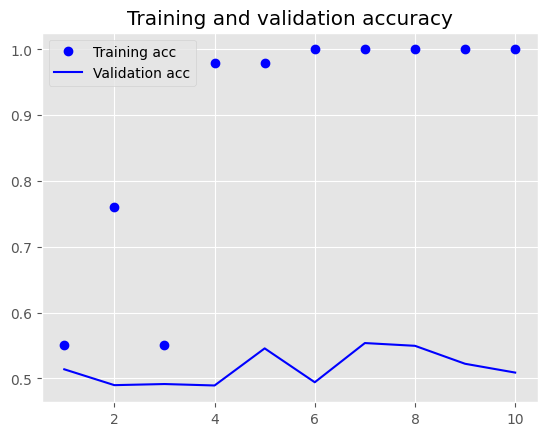

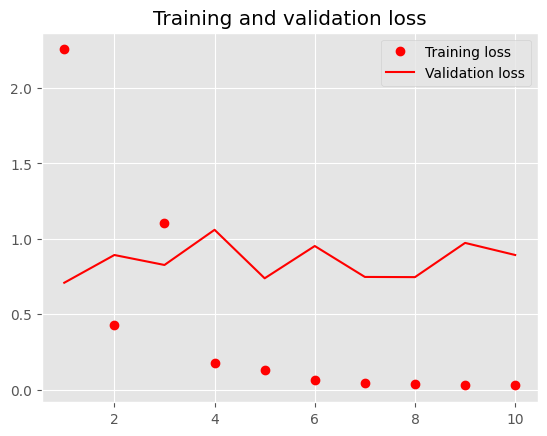

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
valid_accuracy = history.history['val_acc']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [24]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.4791 - loss: 1.0255
Test loss: 1.0125304460525513
Test accuracy: 0.4866800010204315


In [25]:
!pip install tensorflow
# Install tensorflow-text if not already installed
!pip install tensorflow-text

from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras
from tensorflow.keras.utils import pad_sequences # Import pad_sequences from tensorflow.keras
import numpy as np

max_len = 150 # cuts off review after 150 words
training_samples = 500 # Trains on 500 samples
validation_samples = 10000 # Validates 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index    # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=max_len)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [26]:
indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector


In [27]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# The embeddings_initializer argument is used to initialize the embedding layer with the pretrained weights.
model.add(Embedding(max_words, embedding_dim, embeddings_initializer='uniform', input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# This line is no longer needed if you use embeddings_initializer when declaring the layer.
#model.layers[0].set_weights([embedding_matrix])
# The trainable attribute of the embedding layer is set to False to prevent the weights from being updated during training.
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5') # Changed the filename to include .weights.h5


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - acc: 0.5146 - loss: 0.6931 - val_acc: 0.5015 - val_loss: 0.6964
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - acc: 0.8715 - loss: 0.5870 - val_acc: 0.4952 - val_loss: 0.7086
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - acc: 0.9265 - loss: 0.4500 - val_acc: 0.4953 - val_loss: 0.7042
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - acc: 0.9821 - loss: 0.3426 - val_acc: 0.4970 - val_loss: 0.7173
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - acc: 0.9807 - loss: 0.2548 - val_acc: 0.4988 - val_loss: 0.7389
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - acc: 0.9860 - loss: 0.1952 - val_acc: 0.4932 - val_loss: 0.7816
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - acc: 0.9810 - loss: 0.1652 - val_acc: 0.5000 - val_loss: 0.7646
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - acc: 1.0000 - loss: 0.1080 - val_acc: 0.4966 - val_loss: 0.7686
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - acc: 1.00

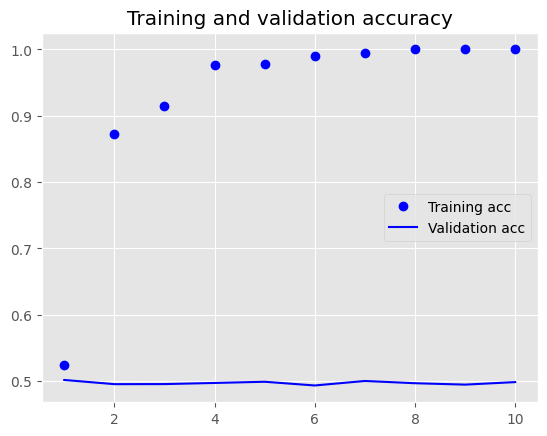

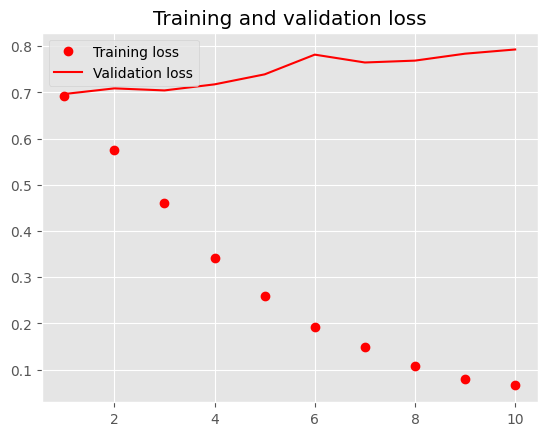

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
valid_accuracy = history.history['val_acc']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.5019 - loss: 0.7768
Test loss: 0.7822678685188293
Test accuracy: 0.4970000088214874


In [30]:
!pip install keras
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np


maxlen = 150 # cuts off review after 150 words
training_samples = 1000 #Trains on 1000 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index      # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [31]:
indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [32]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Add weights parameter and set trainable to False
model.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Remove the line that attempts to set weights manually
# model.layers[0].set_weights([embedding_matrix]) # This line is causing the error. Remove it.
# model.layers[0].trainable = False # This is already set in the Embedding layer initialization

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5') # Changed the filename to include .weights.h5


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - acc: 0.5359 - loss: 1.1975 - val_acc: 0.4999 - val_loss: 0.6932
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.5304 - loss: 0.7407 - val_acc: 0.4999 - val_loss: 0.8220
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.6110 - loss: 0.6923 - val_acc: 0.4994 - val_loss: 0.9694
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.7151 - loss: 0.5743 - val_acc: 0.4913 - val_loss: 0.7586
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.7829 - loss: 0.5211 - val_acc: 0.4988 - val_loss: 0.9399
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.8162 - loss: 0.3931 - val_acc: 0.4977 - val_loss: 0.7876
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.9328 - loss: 0.2467 - val_acc: 0.4991 - val_loss: 0.8332
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.9812 - loss: 0.1602 - val_acc: 0.4983 - val_loss: 1.0746
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.9783

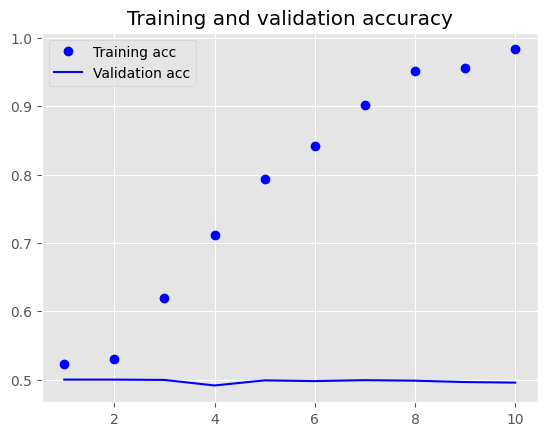

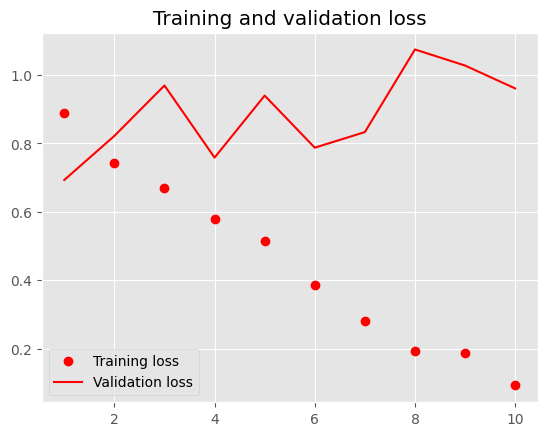

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
valid_accuracy = history.history['val_acc']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.5035 - loss: 0.9598
Test loss: 0.9624125957489014
Test accuracy: 0.5006399750709534


In [35]:
!pip install tensorflow
!pip install keras

from tensorflow.keras.preprocessing.text import Tokenizer #Updated to get Tokenizer from tensorflow.keras
from keras.utils import pad_sequences
import numpy as np

max_len = 150 # cuts off review after 150 words
training_samples = 10000 # Trains on 10000 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index       # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [36]:
indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [37]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Add weights parameter and set trainable to False during initialization
model.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Remove the line that attempts to set weights manually
# model.layers[0].set_weights([embedding_matrix]) # This line is causing the error. Remove it.
# model.layers[0].trainable = False # This is already set in the Embedding layer initialization

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5') # Changed the filename to include .weights.h5

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - acc: 0.5086 - loss: 0.8788 - val_acc: 0.4981 - val_loss: 0.6932
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.4989 - loss: 0.6958 - val_acc: 0.5024 - val_loss: 0.6962
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.5027 - loss: 0.6934 - val_acc: 0.5017 - val_loss: 0.6938
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.5064 - loss: 0.6892 - val_acc: 0.5030 - val_loss: 0.7184
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - acc: 0.5780 - loss: 0.6715 - val_acc: 0.5030 - val_loss: 0.7675
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc: 0.6553 - loss: 0.6038 - val_acc: 0.4907 - val_loss: 0.8782
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.7462 - loss: 0.5106 - val_acc: 0.4928 - val_loss: 0.8916
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc: 0.7942 - loss: 0.4422 - val_acc: 0.4919 - val_loss: 1.0491
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/ste

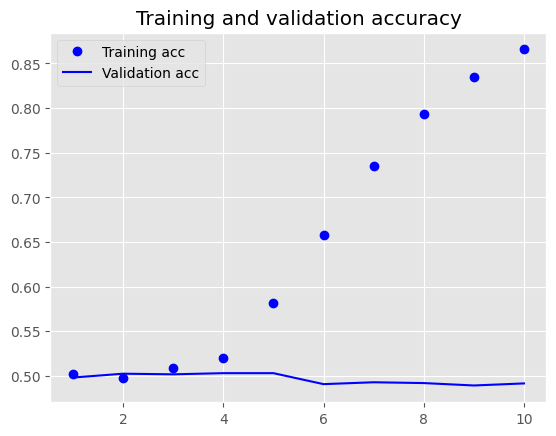

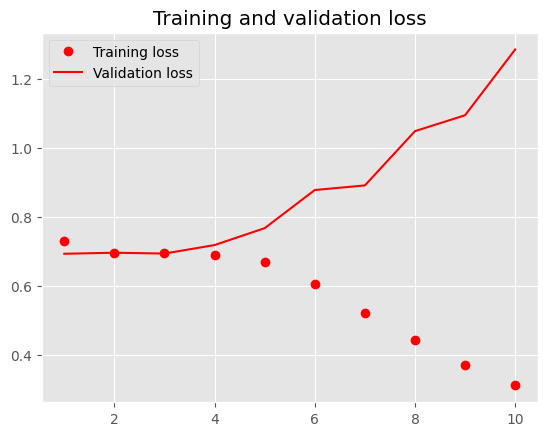

In [38]:
import matplotlib.pyplot as plt
acc = history.history['acc']
valid_accuracy = history.history['val_acc']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.5123 - loss: 1.2575
Test loss: 1.268601417541504
Test accuracy: 0.5048400163650513
